In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K

In [3]:
data = pd.read_csv('DATA/Breast Cancer Wisconsin.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Exploracion de los datos

In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

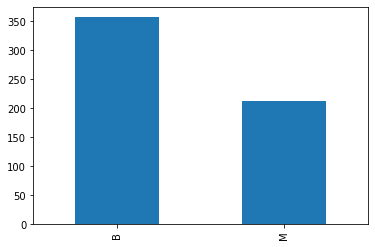

In [14]:
data['diagnosis'].value_counts().plot(kind='bar')

## Preparacion de los datos de entrada

### Reorganizamiento aleatorio de las filas en los datos:

In [30]:
data = data.sample(frac=1).reset_index(drop=True)

### Separacion entre datos de entrada y de salida

In [31]:
X_dataframe = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].copy()

In [37]:
X_dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.450,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.027800,0.1638,0.05710,...,15.100,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603
1,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.069870,0.1942,0.06902,...,15.530,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160
2,11.900,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.030030,0.1995,0.07839,...,13.150,16.51,86.26,509.6,0.1424,0.25170,0.09420,0.06042,0.2727,0.10360
3,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.015040,0.1717,0.06899,...,10.410,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211
4,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.030270,0.1840,0.05680,...,16.510,32.29,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.000000,0.2163,0.07359,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
565,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.090630,0.1663,0.05391,...,21.440,30.96,139.80,1421.0,0.1528,0.18450,0.39770,0.14660,0.2293,0.06091
566,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769
567,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.109700,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100


In [38]:
Y_dataframe = data[['diagnosis']].copy()

In [45]:
Y_dataframe

,diagnosis
0,B
1,B
2,B
3,B
4,B
...,...
564,B
565,M
566,B
567,M


### Procesado de los datos para ser empleados por la red neuronal

In [46]:
def encode_cancer_type(tipo):
    if tipo == 'M':
        return 1
    else:
        return 0

In [49]:
Y_dataframe['diagnosis'] = Y_dataframe.apply(lambda row: encode_cancer_type(row['diagnosis']),axis=1)

In [50]:
Y_dataframe

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,1
566,0
567,1


### Estandarizacion de los datos de entrada

In [53]:
X_dataframe = (X_dataframe-X_dataframe.mean())/X_dataframe.std()

In [54]:
X_dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.192191,-0.230095,-0.220957,-0.283561,0.415221,-0.429650,-0.615397,-0.544268,-0.633315,-0.806985,...,-0.241906,0.042754,-0.287812,-0.318224,0.067072,-0.503158,-0.642727,-0.540012,-0.360053,-0.991947
1,-0.223405,-0.797401,-0.225484,-0.383301,0.813397,0.930817,0.352493,0.539931,0.475597,0.881313,...,-0.152939,-0.404673,-0.315488,-0.466637,0.929879,1.429007,1.023905,0.854888,1.012235,0.977461
2,-0.632026,-1.078728,-0.570355,-0.631089,1.339558,0.478275,-0.648513,-0.486798,0.668926,2.208440,...,-0.645362,-1.491513,-0.624989,-0.651583,0.439349,-0.016303,-0.853153,-0.824346,-0.280852,1.088195
3,-1.322993,0.399985,-1.311126,-1.095407,0.571647,-0.503874,-0.841438,-0.873110,-0.345144,0.877064,...,-1.212269,0.957132,-1.197267,-0.965797,0.982436,-0.558453,-0.853537,-0.752084,-0.036781,0.452027
4,0.173865,1.425320,0.112390,0.038961,-0.967730,-0.609720,-0.598964,-0.480613,0.103528,-0.849476,...,0.049824,1.075903,0.004130,-0.095165,-1.154875,-0.741500,-0.532481,-0.077682,-0.288933,-0.796501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.569301,-0.160345,-1.558873,-1.232372,0.784956,-0.868559,-1.113893,-1.260710,1.281746,1.528589,...,-1.513930,-0.526698,-1.506172,-1.124924,0.102109,-1.122404,-1.304683,-1.743529,0.389937,-0.154243
565,1.550123,1.327669,1.470472,1.523414,0.486324,-0.106622,0.962128,1.074943,-0.542121,-1.258804,...,1.069843,0.859511,0.968343,0.949171,0.894842,-0.443413,0.601615,0.486728,-0.982351,-1.275426
566,-0.958356,-1.004328,-0.975721,-0.851313,-1.310446,-1.002617,-0.831529,-1.057761,-1.505123,-0.838145,...,-0.893642,-0.806543,-0.877053,-0.771718,-1.084799,-0.838744,-0.837096,-1.224302,-0.971037,-0.900037
567,0.378175,-1.720434,0.433391,0.233042,2.086138,0.968687,1.435035,1.566402,0.563142,1.117845,...,0.521557,-1.405282,0.527900,0.388889,0.907981,0.661226,1.489815,1.035925,0.509548,0.944241


In [60]:
dataset_tensor = tf.data.Dataset.from_tensor_slices((X_dataframe.values, Y_dataframe.values))
dataset_tensor

<TensorSliceDataset shapes: ((30,), (1,)), types: (tf.float64, tf.int64)>

In [184]:
x_tensor = tf.constant(X_dataframe.values, dtype = tf.float32, shape=[569,30])
y_tensor = tf.constant(Y_dataframe.values, dtype = tf.float32, shape=[569,1])

In [187]:
DATASET_SIZE = 569
train_size = int(0.7 * DATASET_SIZE)
test_size = int(0.3 * DATASET_SIZE)

x_train = x_tensor[:train_size]
x_test = x_tensor[train_size:]

y_train = y_tensor[:train_size]
y_test = y_tensor[train_size:]


### Creacion del primer modelo

In [244]:
inputs = layers.Input(shape=(30,1))
x = layers.Dense(100,activation='relu')(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(100,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(100,activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(inputs=inputs, outputs=output)

In [245]:
model_1.compile(optimizer= "Adam",
             loss="BinaryCrossentropy",
             metrics=["acc"])

In [246]:
history_1 = model_1.fit(x_train,y_train, 
                    validation_data = (x_test,y_test),
                    verbose=2,
                    epochs=10)

Epoch 1/10
13/13 - 0s - loss: 0.6463 - acc: 0.7047 - val_loss: 0.5842 - val_acc: 0.7507
Epoch 2/10
13/13 - 0s - loss: 0.5474 - acc: 0.7547 - val_loss: 0.5356 - val_acc: 0.7511
Epoch 3/10
13/13 - 0s - loss: 0.5300 - acc: 0.7556 - val_loss: 0.5399 - val_acc: 0.7501
Epoch 4/10
13/13 - 0s - loss: 0.5290 - acc: 0.7539 - val_loss: 0.5349 - val_acc: 0.7503
Epoch 5/10
13/13 - 0s - loss: 0.5267 - acc: 0.7548 - val_loss: 0.5340 - val_acc: 0.7497
Epoch 6/10
13/13 - 0s - loss: 0.5279 - acc: 0.7528 - val_loss: 0.5349 - val_acc: 0.7489
Epoch 7/10
13/13 - 0s - loss: 0.5294 - acc: 0.7517 - val_loss: 0.5369 - val_acc: 0.7495
Epoch 8/10
13/13 - 0s - loss: 0.5253 - acc: 0.7535 - val_loss: 0.5341 - val_acc: 0.7489
Epoch 9/10
13/13 - 0s - loss: 0.5240 - acc: 0.7542 - val_loss: 0.5339 - val_acc: 0.7503
Epoch 10/10
13/13 - 0s - loss: 0.5248 - acc: 0.7522 - val_loss: 0.5334 - val_acc: 0.7489


In [247]:
hist = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch 

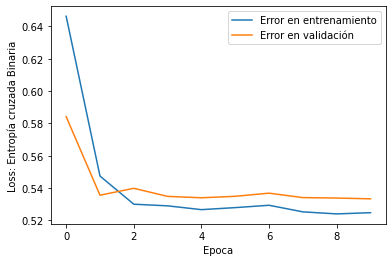

In [248]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada Binaria')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.legend()
plt.show()

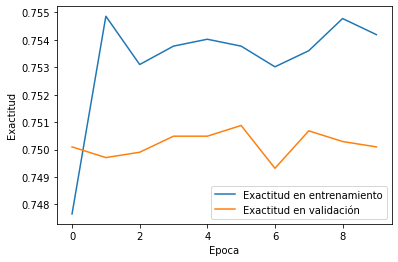

In [243]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['acc'],
           label='Exactitud en entrenamiento')
plt.plot(hist['epoch'], hist['val_acc'],
           label='Exactitud en validación')
plt.legend()
plt.show()